# THE SPARKS FOUNDATION GRIP TASK -1
NAME: ABHIJEET KATRE

DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP, feb - 2022

TASK -1: PREDICTION USING SUPERVISED ML

OBJECTIVE: To predict the percentage score of an student based on the No. of study hours he/she studied.


# Importing all the required libraries.

In [7]:
#Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [13]:
#Reading data from remote link
df = pd.read_csv('http://bit.ly/w-data')

# Describing the data


In [14]:
print(df.shape)

(25, 2)


In [15]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [17]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the Data

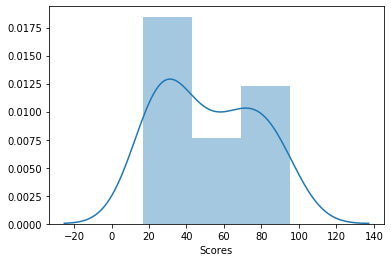

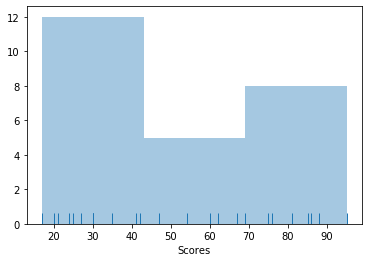

In [20]:
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"], kde=False, rug=True)
plt.show()

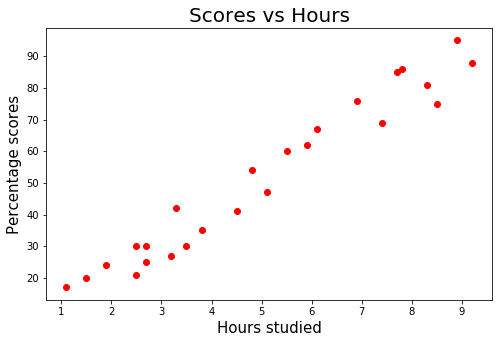

In [21]:
 #Plotting the distribution of scores
 plt.figure(figsize=(8,5))
 plt.title('Scores vs Hours', size=20)
 plt.xlabel("Hours studied", size=15)
 plt.ylabel("Percentage scores",size=15)
 plt.scatter(df.Hours,df.Scores,color='red')
 plt.show()

In [24]:
# Evaluating correlation coefficient between Percentage Score and Hours studied
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing the data

In [33]:
# Dividing the data into "attributes" (inputs) and "labels" (outputs)
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [34]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [35]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the data into Training and Testing sets


In [36]:
#Using train_test_spilt from scikit-learn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#  Training the model

In [39]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)
print("Training Complete")

Training Complete


# Plotting the line of Regression

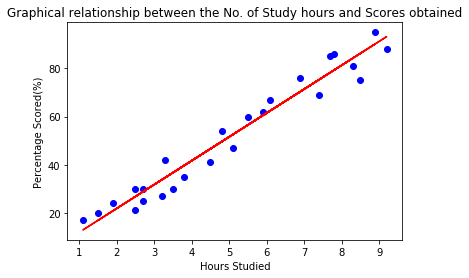

In [40]:
# plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting the scatter plot with regression line
plt.scatter(X, y, color='blue', marker='o')
plt.plot(X, line,color='red');
plt.title('Graphical relationship between the No. of Study hours and Scores obtained')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored(%)')
plt.show()



In [41]:
print('intercept= {},\
slope coefficient={}'.format(regressor.intercept_,regressor.coef_))

intercept= 2.018160041434683,slope coefficient=[9.91065648]


# Model Prediction

In [43]:
# Testing data
print(X_test)
# Model Prediction
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual and Predicted Results

In [44]:
# Comparing Actual Vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [52]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737538


# Hence, it can be concluded that the predicted score of a person studying for 9.25 hours is 93.69173248737538.

In [53]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R2: 0.9454906892105356
